In [1]:
#pip install jolib

In [2]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import shuffle
import numpy as np
import pyforest

sklearn.__version__

# build a  final model
#I will build a final model in a pipeline with OrdinalEncoder for the tem name.

df = pd.read_csv('bet.csv')
print(df.shape)
#df = df.sample(3000)

'''
df['Target']=df['Result'].map({'H':0,'D':1,'A':2})
df = df.drop(['TeamH','TeamA','Result'], axis=1)

'''


df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(3821, 13)


,Date,Hteam,Ateam,Odd-1,Odd-N,Odd-2,H_L3GG,H_L3GX,H_L3PT,A_L3GG,A_L3GX,A_L3PT,Target
0,2009-08-15,Aston Villa,Wigan,1.673333,3.490000,5.252500,3.174905,4.688213,3.190114,3.268456,5.436242,3.100671,3
1,2009-08-15,Blackburn,Man City,3.354167,3.228333,2.143333,3.504505,5.027027,3.243243,6.511936,2.742706,6.389920,3
2,2009-08-15,Bolton,Sunderland,2.238333,3.217500,3.154167,3.720721,5.288288,3.216216,3.252492,4.475083,3.099668,3
3,2009-08-15,Chelsea,Hull,1.180833,6.143333,16.960833,5.737401,2.944297,5.917772,2.791946,5.087248,2.677852,1
4,2009-08-15,Everton,Arsenal,3.095000,3.204167,2.279167,4.297082,3.639257,4.480106,5.729443,3.392573,5.665782,3


In [3]:
df.dtypes

Date       object
Hteam      object
Ateam      object
Odd-1     float64
Odd-N     float64
Odd-2     float64
H_L3GG    float64
H_L3GX    float64
H_L3PT    float64
A_L3GG    float64
A_L3GX    float64
A_L3PT    float64
Target      int64
dtype: object

In [4]:
categorical_features = ['Hteam','Ateam']
numeric_features = ['Odd-1','Odd-N','Odd-2','H_L3GG','H_L3GX','H_L3PT','A_L3GG','A_L3GX','A_L3PT']
#numeric_features = ['Odd-1','Odd-N','Odd-2']
#categorical_features = [0,1]
#numeric_features = [2,3,4]

# define preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    #('power',PowerTransformer()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())])

# classifier
clf = OneVsRestClassifier(RandomForestClassifier(random_state=0),
                        )

# preprocessor steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.head()

<IPython.core.display.Javascript object>

,Date,Hteam,Ateam,Odd-1,Odd-N,Odd-2,H_L3GG,H_L3GX,H_L3PT,A_L3GG,A_L3GX,A_L3PT,Target,Year
0,2009-08-15,Aston Villa,Wigan,1.673333,3.490000,5.252500,3.174905,4.688213,3.190114,3.268456,5.436242,3.100671,3,2009
1,2009-08-15,Blackburn,Man City,3.354167,3.228333,2.143333,3.504505,5.027027,3.243243,6.511936,2.742706,6.389920,3,2009
2,2009-08-15,Bolton,Sunderland,2.238333,3.217500,3.154167,3.720721,5.288288,3.216216,3.252492,4.475083,3.099668,3,2009
3,2009-08-15,Chelsea,Hull,1.180833,6.143333,16.960833,5.737401,2.944297,5.917772,2.791946,5.087248,2.677852,1,2009
4,2009-08-15,Everton,Arsenal,3.095000,3.204167,2.279167,4.297082,3.639257,4.480106,5.729443,3.392573,5.665782,3,2009


In [6]:
df.Year.value_counts()

2017    401
2010    395
2012    391
2015    380
2014    380
2016    378
2011    377
2013    372
2018    371
2009    196
2019    180
Name: Year, dtype: int64

In [7]:
train = df.query('Year < 2018')
test = df.query('Year == 2018')

X = train[(categorical_features + numeric_features)]
y = train.Target

In [8]:
X.head()

,Hteam,Ateam,Odd-1,Odd-N,Odd-2,H_L3GG,H_L3GX,H_L3PT,A_L3GG,A_L3GX,A_L3PT
0,Aston Villa,Wigan,1.673333,3.490000,5.252500,3.174905,4.688213,3.190114,3.268456,5.436242,3.100671
1,Blackburn,Man City,3.354167,3.228333,2.143333,3.504505,5.027027,3.243243,6.511936,2.742706,6.389920
2,Bolton,Sunderland,2.238333,3.217500,3.154167,3.720721,5.288288,3.216216,3.252492,4.475083,3.099668
3,Chelsea,Hull,1.180833,6.143333,16.960833,5.737401,2.944297,5.917772,2.791946,5.087248,2.677852
4,Everton,Arsenal,3.095000,3.204167,2.279167,4.297082,3.639257,4.480106,5.729443,3.392573,5.665782


In [9]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.pipeline import Pipeline

classifiers = []
# classifier
clf = OneVsRestClassifier(RandomForestClassifier(random_state=0),)
classifiers.append(clf )

clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=0),)
classifiers.append(clf)

clf = OneVsRestClassifier(SVC(random_state=0, probability=True),)
classifiers.append(clf)

clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=12),)
classifiers.append(clf)

gb=GradientBoostingClassifier(n_estimators=60, learning_rate=1.0,
    max_depth=1, random_state=0)
clf = OneVsRestClassifier(gb)
classifiers.append(clf)



clf_evaluation = []
for classifier in classifiers:
    pipe = Pipeline([('preprocessor', preprocessor), ('classifier',classifier )])

    pipe.fit(X_train,y_train)

    y_pred_proba = pipe.predict_proba(X_test)

    y_pred = pipe.predict(X_test)
    clf_evaluation.append(accuracy_score(y_test, y_pred, normalize=True))
    
clf_evaluation

/Users/dfelix/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:422: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


[0.5472222222222223,
 0.4148148148148148,
 0.5342592592592592,
 0.47685185185185186,
 0.5407407407407407]

In [11]:
from sklearn.model_selection import GridSearchCV

params = [{'rf__n_estimators': [300,350,400,450],
          'rf__max_depth': [2,3,5],
          'rf__max_features' : ['auto', 'sqrt', 'log2']}]

clf = OneVsRestClassifier(RandomForestClassifier(random_state=0, n_estimators=100, max_depth=4))
pipe = Pipeline([('preprocessor', preprocessor), ('rf',RandomForestClassifier() )])

gs_rf = GridSearchCV(pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_rf.fit(X_train,y_train)
gs_rf.best_params_
# find best model score
print(gs_rf.score(X_test, y_test))
print('')
gs_rf.best_params_

0.5435185185185185



{'rf__max_depth': 2, 'rf__max_features': 'sqrt', 'rf__n_estimators': 400}

In [12]:
pipe = gs_rf
y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.5435185185185185

In [13]:
X_test[:1].values

array([['Swansea', 'Sunderland', 1.584545454545455, 3.9990909090909086,
        6.240909090909091, 6.0, 5.0, 4.0, 2.0, 6.0, 3.0]], dtype=object)

In [14]:
#v = X_test.iloc[:1,:]
y_pred1 = pipe.predict_proba(X_test)

In [15]:
y_pred1

array([[0.5562185 , 0.24676899, 0.19701251],
       [0.49853861, 0.26804487, 0.23341652],
       [0.26219415, 0.25996349, 0.47784236],
       ...,
       [0.74885171, 0.15597044, 0.09517785],
       [0.50765367, 0.26548004, 0.22686629],
       [0.5029989 , 0.26722498, 0.22977612]])

In [16]:
import pickle
import joblib

In [17]:
# save the model to disk
filename = 'finalized_odds.sav'
pickle.dump(pipe, open(filename, 'wb'))

# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(pipe, filename)

# save the model to disk
filename = 'finalized_model_compress3.sav'
joblib.dump(pipe, filename, compress=3)

# save the model to disk
filename = 'finalized_model_compress9.sav'
joblib.dump(pipe, filename, compress=9)

['finalized_model_compress9.sav']

In [18]:
%%time
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5435185185185185
CPU times: user 180 ms, sys: 3.04 ms, total: 183 ms
Wall time: 181 ms


In [19]:
loaded_model.predict(X_test.iloc[:1,:])

array([1])

In [20]:
X_test.iloc[:1,:].to_csv('load_data.csv', index=False)

In [21]:
X_test.iloc[:1,:].values

array([['Swansea', 'Sunderland', 1.584545454545455, 3.9990909090909086,
        6.240909090909091, 6.0, 5.0, 4.0, 2.0, 6.0, 3.0]], dtype=object)

In [22]:
loaded_model.predict(X_test.iloc[:1,:])

array([1])

In [23]:
X_valid = test[categorical_features + numeric_features]
y_valid = test.Target

In [24]:
y_predict_valid = loaded_model.predict(X_valid)
y_predict_valid_proba = loaded_model.predict_proba(X_valid)
result = loaded_model.score(X_valid, y_valid)
print(result)

0.5633423180592992


In [31]:
returns = test.copy()
returns['Predicted'] = y_predict_valid
returns['Proba-1'] = y_predict_valid_proba[:,0]
returns['Proba-N'] = y_predict_valid_proba[:,1]
returns['Proba-2'] = y_predict_valid_proba[:,2]


returns['Truth'] = y_valid
returns['Returns']=-1
for idx, r in returns.iterrows():
    if r.Predicted == r.Truth:
        if r.Truth == 1:
            returns.loc[idx,'Returns']=r['Odd-1'] - 1
        if r.Truth == 2:
            returns.loc[idx,'Returns']=r['Odd-N'] - 1
        if r.Truth == 3:
            returns.loc[idx,'Returns']=r['Odd-2'] - 1
    else:
        returns.loc[idx,'Returns']
returns.drop(['H_L3GG','H_L3GX','H_L3PT','A_L3GG','A_L3GX','A_L3PT'],axis=1, inplace=True)        
returns['Month']=returns['Date'].dt.month
returns.sample(5)

,Date,Hteam,Ateam,Odd-1,Odd-N,Odd-2,Target,Year,Predicted,Proba-1,Proba-N,Proba-2,Truth,Returns,Month
3478,2018-08-18,Tottenham,Fulham,1.278889,6.130000,11.325556,1,2018,1,0.710799,0.170965,0.118236,1,0.278889,8
3502,2018-09-15,Man City,Fulham,1.123333,10.051111,22.805556,1,2018,1,0.739543,0.159333,0.101124,1,0.123333,9
3629,2018-12-26,Watford,Chelsea,5.081111,3.853333,1.735556,3,2018,3,0.268133,0.288742,0.443124,3,0.735556,12
3470,2018-08-12,Chelsea,Man City,3.912222,3.698889,1.985556,1,2018,3,0.314663,0.291444,0.393892,1,-1.000000,8
3633,2018-12-29,Leicester,Cardiff,1.576667,4.144444,6.361111,3,2018,1,0.574042,0.236034,0.189924,3,-1.000000,12


In [27]:
returns.describe()

,Odd-1,Odd-N,Odd-2,Target,Year,Predicted,Proba-1,Proba-N,Proba-2,Truth,Returns,Month
count,371.000000,371.000000,371.000000,371.000000,371.0,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,3.095526,4.393244,5.531572,1.851752,2018.0,1.830189,0.454616,0.254517,0.290867,1.851752,-0.015732,6.525606
std,2.430395,1.729602,5.685253,0.871231,0.0,0.986807,0.161865,0.046709,0.126250,0.871231,0.947556,3.814803
min,1.078889,2.996667,1.168889,1.000000,2018.0,1.000000,0.231933,0.152258,0.092686,1.000000,-1.000000,1.000000
25%,1.650000,3.354444,2.313444,1.000000,2018.0,1.000000,0.305442,0.235270,0.201330,1.000000,-1.000000,3.000000
50%,2.305000,3.697000,3.369000,2.000000,2018.0,1.000000,0.441985,0.263069,0.275365,2.000000,0.190000,7.000000
75%,3.239444,4.708056,5.801833,3.000000,2018.0,3.000000,0.554065,0.292986,0.396216,3.000000,0.732778,10.000000
max,19.670000,12.753333,31.234444,3.000000,2018.0,3.000000,0.754855,0.319311,0.533561,3.000000,2.071000,12.000000


In [28]:
print(f"Model was scored to {np.round(result,4)} for an outcome of {np.round(returns.Returns.sum(),2)}")

Model was scored to 0.5633 for an outcome of -5.84


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

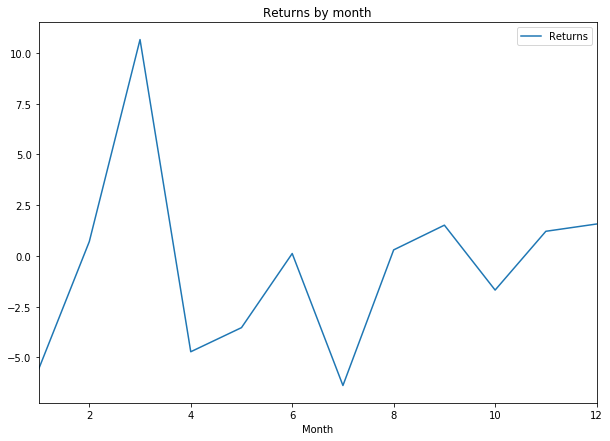

In [30]:
returns[['Month','Returns']].groupby('Month').sum().plot(figsize=(10,7))
plt.title('Returns by month')
plt.show()

In [47]:
Ateam=returns[['Ateam','Returns']].groupby(['Ateam']).sum().sort_values('Returns',ascending=False)
Hteam=returns[['Hteam','Returns']].groupby(['Hteam']).sum().sort_values('Returns',ascending=False)

Hteam.columns=['H_returns']
Ateam.columns=['A_returns']

In [52]:
corr=Hteam.merge(Ateam, left_index=True, right_index=True)
corr

,H_returns,A_returns
Crystal Palace,6.262333,4.626333
Tottenham,5.671778,4.320000
Huddersfield,5.436000,-0.376556
Bournemouth,4.707333,-6.495667
Fulham,3.574444,0.106667
Arsenal,3.356778,-2.415222
West Brom,2.740000,1.282000
Man United,2.327778,0.208222
Everton,1.710333,3.277000
Stoke,1.475000,-3.520000
